In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def EC_at_bifiltration(contributions, f1, f2):
    return sum([c[1] for c in contributions if (c[0][0] <= f1) and (c[0][1] <= f2)])

Load the contributions

In [5]:
contributions_df = pd.read_csv(
    "10_pts.csv", header=None, sep=" ", names=["x", "y", "c"]
)
contributions_df

,x,y,c
0,0.000000,0.543989,1
1,0.000000,0.765272,1
2,0.000000,0.784982,1
3,0.000000,0.810654,1
4,0.000000,0.979813,1
5,0.000000,1.069267,1
6,0.000000,1.151196,1
7,0.000000,1.236160,1
8,0.000000,1.236785,1
9,0.000000,1.386753,1


In [7]:
contributions_list = [((r[0], r[1]), r[2]) for r in contributions_df.values]
contributions_list[:5]

[((0.0, 0.5439893902156914), 1.0),
 ((0.0, 0.7652717518095831), 1.0),
 ((0.0, 0.78498225366767), 1.0),
 ((0.0, 0.8106539103277385), 1.0),
 ((0.0, 0.9798128397007654), 1.0)]

Now we compute the ECP on a fixed grid, the grid values are generated using `np.linspace`   
the `endpoint` parameter controls wheter the last point is included or not

In [10]:
np.linspace(start=0, stop=1, num=5, endpoint=True)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [11]:
np.linspace(start=0, stop=1, num=5, endpoint=False)

array([0. , 0.2, 0.4, 0.6, 0.8])

Compute the discretized ECP on a regular grid

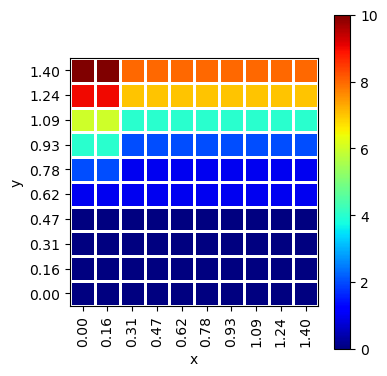

In [26]:
MIN_X = 0
MAX_X = 1.4

MIN_Y = 0
MAX_Y = 1.4

INCLUDE_ENDPOINT = True  # whether to include MAX value in the grid

GRIDSIZE = (10, 10)

## initializing matrix
M = np.zeros(GRIDSIZE, dtype=int)

# computing
for i, x in enumerate(
    np.linspace(start=MIN_X, stop=MAX_X, num=GRIDSIZE[0], endpoint=INCLUDE_ENDPOINT)
):
    for j, y in enumerate(
        np.linspace(start=MIN_Y, stop=MAX_Y, num=GRIDSIZE[1], endpoint=INCLUDE_ENDPOINT)
    ):
        M[j, i] = EC_at_bifiltration(contributions_list, x, y)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
im = ax.pcolormesh(M, edgecolors="w", linewidth=1, cmap="jet")

ax.set_xlabel("x")
ax.set_xticks(
    [i + 0.5 for i in range(GRIDSIZE[0])],
    [
        "{:.2f}".format(l)
        for l in np.linspace(
            start=MIN_X, stop=MAX_X, num=GRIDSIZE[0], endpoint=INCLUDE_ENDPOINT
        )
    ],
    rotation=90,
)

ax.set_ylabel("y")
ax.set_yticks(
    [i + 0.5 for i in range(GRIDSIZE[1])],
    [
        "{:.2f}".format(l)
        for l in np.linspace(
            start=MIN_Y, stop=MAX_Y, num=GRIDSIZE[1], endpoint=INCLUDE_ENDPOINT
        )
    ],
)
plt.colorbar(im, ax=ax)
ax.set_aspect("equal")
plt.tight_layout()
plt.show()

In [24]:
## print the matrix in the same way it is displayed on the plot
M[::-1]

array([[10, 10,  8,  8,  8,  8,  8,  8,  8,  8],
       [ 9,  9,  7,  7,  7,  7,  7,  7,  7,  7],
       [ 6,  6,  4,  4,  4,  4,  4,  4,  4,  4],
       [ 4,  4,  2,  2,  2,  2,  2,  2,  2,  2],
       [ 2,  2,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [31]:
## print the matrix in the same way it is displayed on the C++ code
M.T

array([[ 0,  0,  0,  0,  1,  2,  4,  6,  9, 10],
       [ 0,  0,  0,  0,  1,  2,  4,  6,  9, 10],
       [ 0,  0,  0,  0,  1,  1,  2,  4,  7,  8],
       [ 0,  0,  0,  0,  1,  1,  2,  4,  7,  8],
       [ 0,  0,  0,  0,  1,  1,  2,  4,  7,  8],
       [ 0,  0,  0,  0,  1,  1,  2,  4,  7,  8],
       [ 0,  0,  0,  0,  1,  1,  2,  4,  7,  8],
       [ 0,  0,  0,  0,  1,  1,  2,  4,  7,  8],
       [ 0,  0,  0,  0,  1,  1,  2,  4,  7,  8],
       [ 0,  0,  0,  0,  1,  1,  2,  4,  7,  8]])